In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-08-12 17:16:17.431132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.12.0


In [3]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 7s 2us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [9]:
y_train.shape

(60000,)

In [10]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

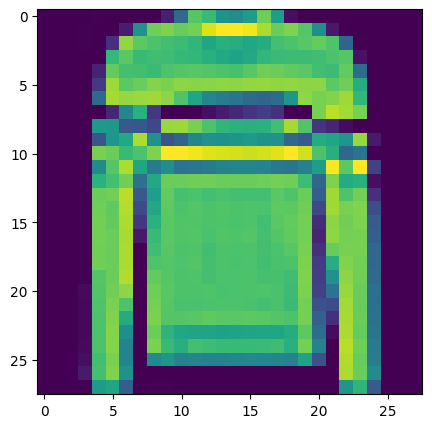

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[5])
plt.grid(False)
plt.show()

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

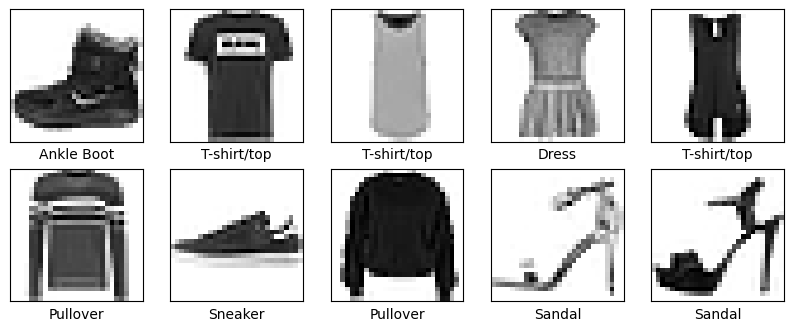

In [22]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [23]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(10)])

2024-08-12 17:35:04.469648: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4913 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3690 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3326 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3101 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2926 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2793 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2687 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2464 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Accuracy {test_acc}')

# Overfit ?

313/313 - 1s - loss: 0.3395 - accuracy: 0.8813 - 1s/epoch - 5ms/step

Test Accuracy 0.8812999725341797


In [27]:
prob = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [28]:
pred = prob.predict(X_test)
pred[1]

313/313 [==============================] - 2s 5ms/step


array([5.8402213e-07, 1.1255746e-17, 9.9989784e-01, 2.3914404e-15,
       6.9545291e-05, 2.4386815e-15, 3.2098731e-05, 3.0355274e-18,
       1.9242950e-14, 2.3790629e-17], dtype=float32)

In [30]:
np.argmax(pred[0])

9

In [33]:
def plot_im(i, pred_arr, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    pred_label = np.argmax(pred_arr)
    if pred_label == true_label:
        color="green"
    else:
        color="red"

    plt.xlabel(f"{class_names[pred_label]} {round(100*np.max(pred_arr))}% {class_names[true_label]}")


def plot_value_arr(i, pred_arr, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    p = plt.bar(range(10), pred_arr)
    plt.ylim([0,1])
    pred_label = np.argmax(pred_arr)

    p[pred_label].set_color('red')
    p[true_label].set_color('green')

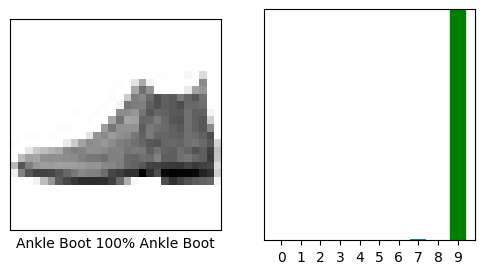

In [34]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_im(i, pred[i], y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_arr(i, pred[i], y_test)
plt.show()

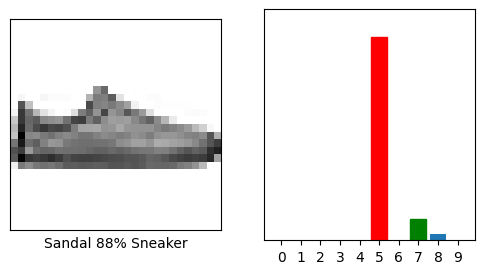

In [35]:
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_im(i, pred[i], y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_arr(i, pred[i], y_test)
plt.show()

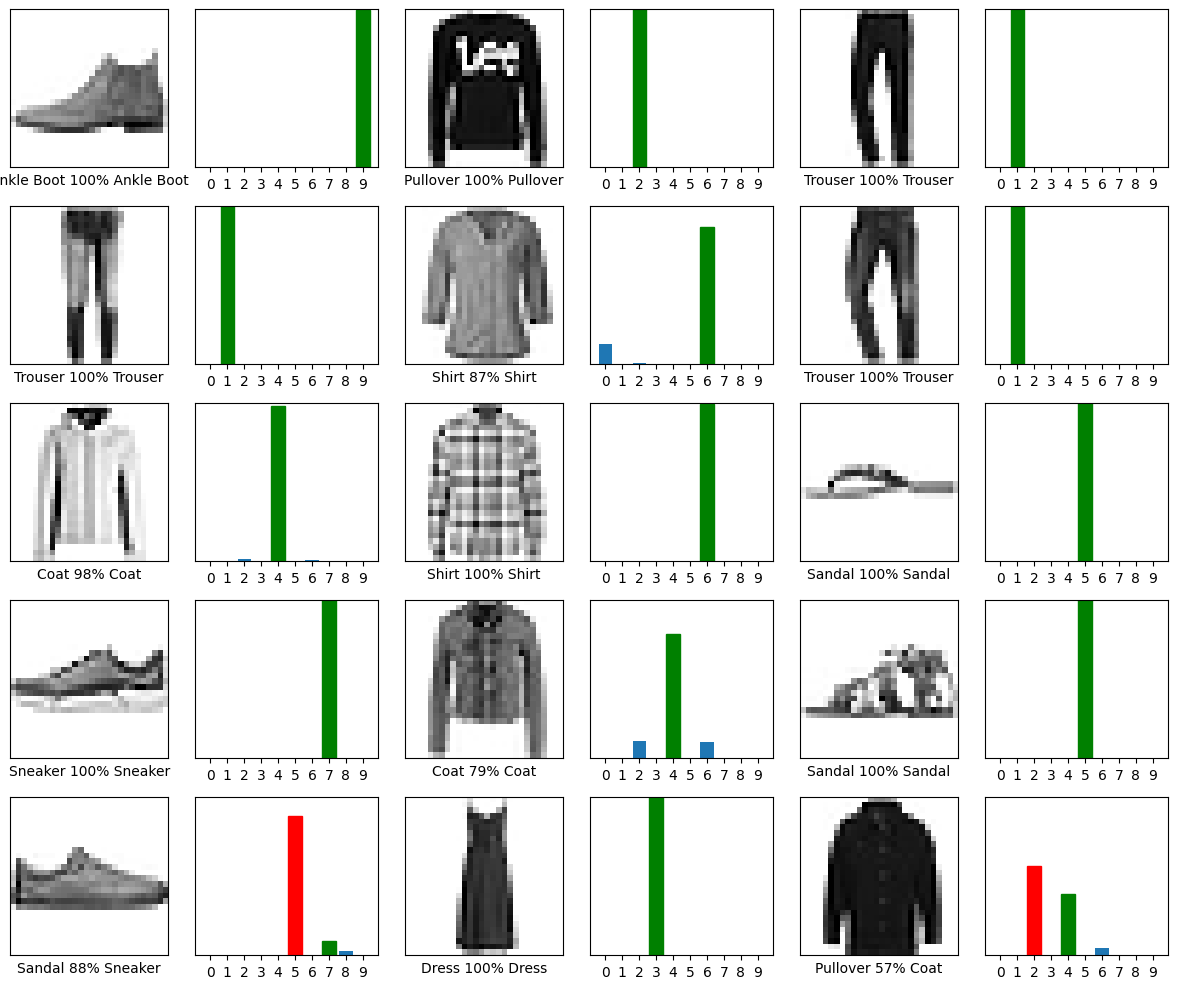

In [37]:
num_rows = 5
num_cols = 3
num_img = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_img):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_im(i, pred[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_arr(i, pred[i], y_test)
plt.tight_layout()
plt.show()

In [38]:
img = X_test[1]

In [39]:
print(img.shape)

(28, 28)


In [40]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [41]:
pred_1 = prob.predict(img)

1/1 [==============================] - 0s 42ms/step


In [42]:
print(pred_1)

[[5.8402327e-07 1.1255831e-17 9.9989784e-01 2.3914404e-15 6.9545487e-05
  2.4386815e-15 3.2098731e-05 3.0355043e-18 1.9242950e-14 2.3790720e-17]]


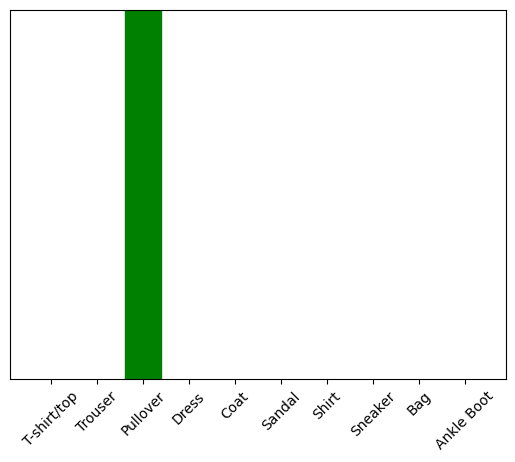

In [44]:
plot_value_arr(1, pred_1[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()